In [1]:
from commonfunctions import *
import math

# Show the matlpotlib figures inside the notebook
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
def deskew(img):
    edged = cv2.Canny(img, 50, 200, None, 3)
    linesP = cv2.HoughLinesP(edged, 1, np.pi / 180, 50, None, 0, 20)
    # if linesP is not None:
    #     for i in range(0, len(linesP)):
    #         l = linesP[i][0]
    #         cv2.line(img, (l[0], l[1]), (l[2], l[3]), (125,125,125), 3, cv2.LINE_AA)
    slopes = [(y2 - y1)/(x2 - x1) if (x2-x1) else math.inf for x1, y1, x2, y2 in linesP[:,0,:]]
    deg_angles = [np.degrees(np.arctan(x)) for x in slopes]

    histo = np.histogram(deg_angles, bins=180)
    bar(histo[1][:180].astype(np.uint8), histo[0][:180], width=0.8, align='center')
    # most frequent slope of all lines
    rotation_number = histo[1][np.argmax(histo[0])]
    print(rotation_number)
    rotated = rotate(img, rotation_number, resize=True)
    if rotated.dtype != "uint8":
        return (rotated * 255).astype("uint8")
    return rotated

../inputs/test-set-scanned/test-cases
-0.2397075972465621


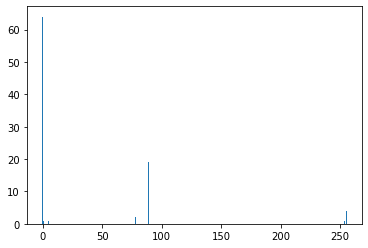

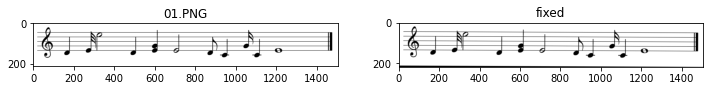

-0.3837908533502912


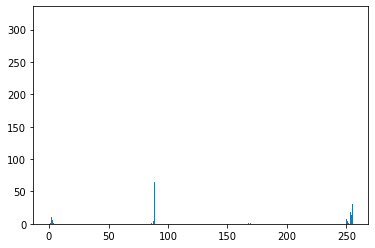

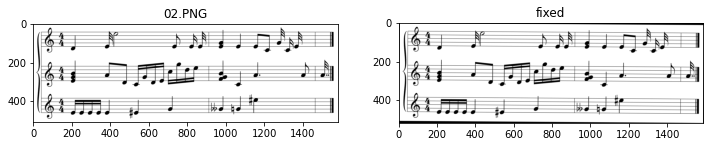

-0.34877278125177513


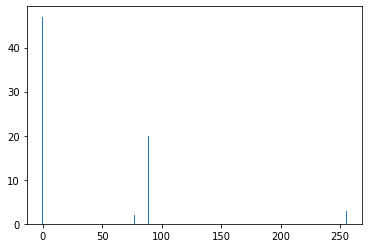

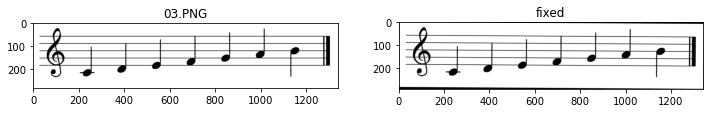

-0.4977610599438469


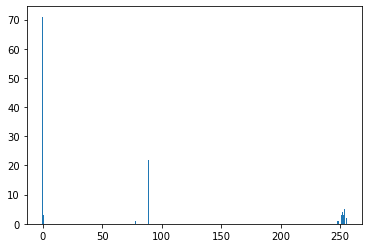

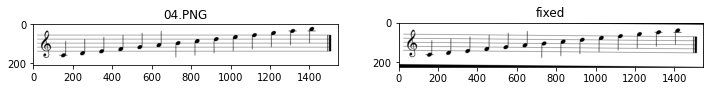

-0.6261272971570548


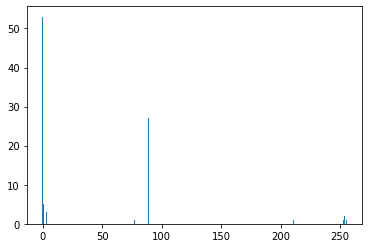

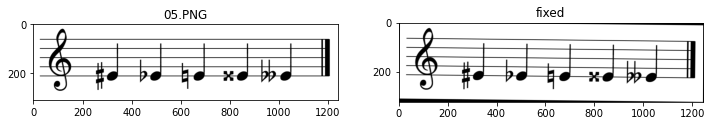

-0.6261272971570548


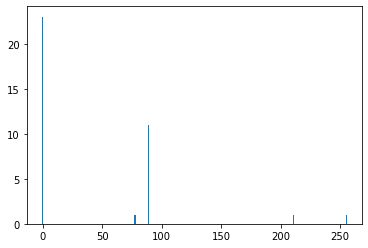

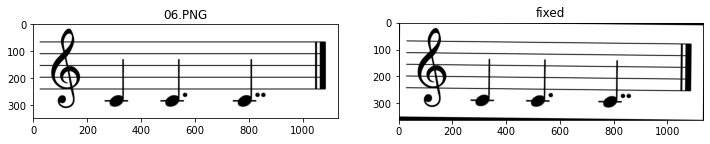

-0.732359682765761


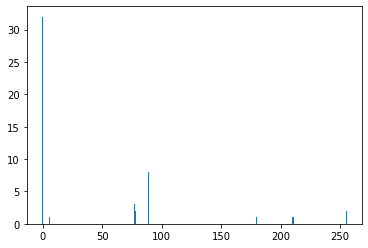

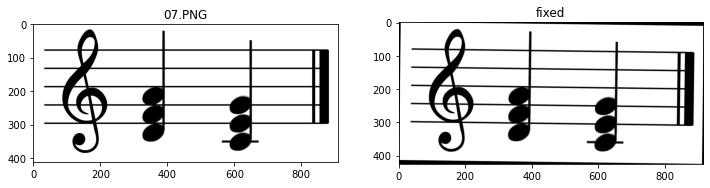

-0.7344707434709221


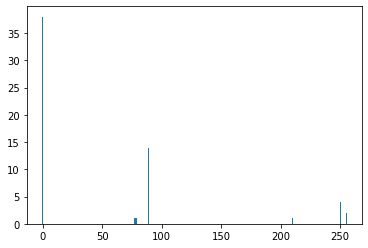

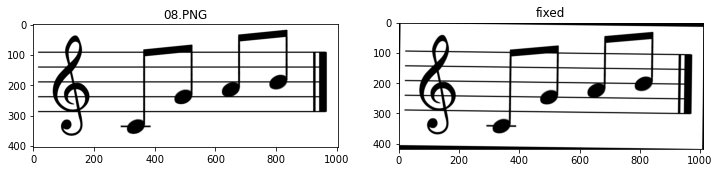

-0.04454519261000911


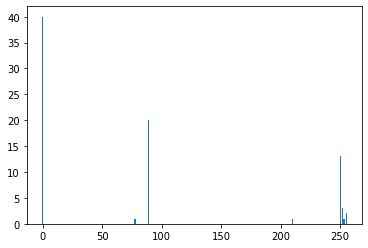

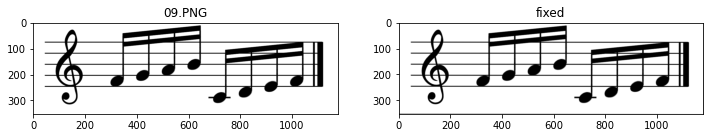

-0.2933802059978987


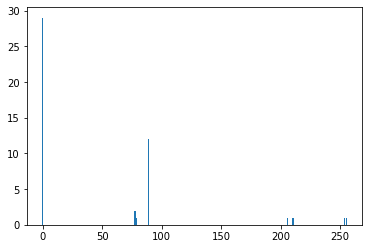

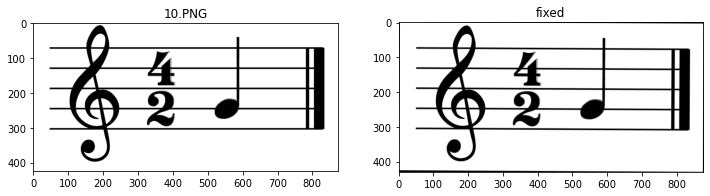

In [3]:
images, files = load_images_from_folder("../inputs/test-set-scanned/test-cases")
# images, files = load_images_from_folder("../inputs/test-set-camera-captured/test-cases")
outpath = "../outputs/"
for image, file in zip(images, files):
    h, w = image.shape
    _, wid = get_dimensions(w, h)
    if wid != 0:
        image = resize(image, width = wid)
    fixed = deskew(image)
    show_images([image, fixed], [file, "fixed"])
    cv2.imwrite(outpath + file, fixed)